# EDA Final group project criteria

You will pick a real-world dataset of your choice and apply the concepts learned in this course to perform exploratory data analysis. Use this starter notebook as an outline for your project . 

Focus on documentation and presentation - this Jupyter notebook will also serve as a project report, so make sure to include detailed explanations wherever possible using Markdown cells.

### Evaluation Criteria

Your submission will be evaluated using the following criteria:

* Dataset must contain at least 3 columns and 150 rows of data
* You must ask and answer at least 4 questions about the dataset
* Your submission must include at least 4 visualizations (graphs)
* Your submission must include explanations using markdown cells, apart from the code.
# Do not plagiarize i.e. copy-pasted from somewhere else.


Follow this step-by-step guide to work on your project.

### Step 1: Select a real-world dataset 

- Take an interesting dataset: https://github.com/awesomedata/awesome-public-datasets
- The data should be in CSV format, and should contain at least 3 columns and 150 rows
- Write some introduction about your project here: 
    - describe the dataset and what you're trying to do with it.

# Solutions

### Data explantion

- The chicago crime dataset provided by the chicago data portal will be used in my project . The chicago police department has registered numerous criminal cases daily since 2001 and has made this data available publicly in their webiste

- My dataset contains 1.9 lakh records(rows) and 22 features(columns) crimes of year 2020(except some days of december).

- The focus of project is to perform an in-depth analysis of the major types of crimes that occurred in the city, observe the trend over the months. determine which area has the highest crimes on the basis of crime categories,etc.


In [83]:
import pandas as pd
from pandas import read_csv

data = read_csv("crimes.csv")                 #reading the csv file 
print("Rows and Columns: ",data.shape)        #printing the number of rows and columns
data.info()                                   #Data information (datatype, columns)


Rows and Columns:  (199186, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199186 entries, 0 to 199185
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    199186 non-null  int64  
 1   Case Number           199186 non-null  object 
 2   Date                  199186 non-null  object 
 3   Month                 199186 non-null  object 
 4   Block                 199186 non-null  object 
 5   IUCR                  199186 non-null  object 
 6   Primary Type          199186 non-null  object 
 7   Description           199186 non-null  object 
 8   Location Description  198115 non-null  object 
 9   Arrest                199186 non-null  bool   
 10  Domestic              199186 non-null  bool   
 11  Beat                  199186 non-null  int64  
 12  District              199186 non-null  int64  
 13  Ward                  199178 non-null  float64
 14  Community Area      

199186

In [50]:
data.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.991860e+05,199186.000000,199186.000000,199178.000000,199186.000000,1.979080e+05,1.979080e+05,199186.0,197908.000000,197908.000000
mean,1.204775e+07,1143.621595,11.207254,22.925976,37.459294,1.164839e+06,1.885171e+06,2020.0,41.840502,-87.670646
std,7.433692e+05,693.876094,6.934446,13.728888,21.509400,1.632006e+04,3.185680e+04,0.0,0.087615,0.059382
min,2.488900e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2020.0,41.644590,-87.934567
25%,1.201615e+07,612.000000,6.000000,10.000000,23.000000,1.152861e+06,1.857904e+06,2020.0,41.765357,-87.714070
50%,1.209224e+07,1022.000000,10.000000,23.000000,32.000000,1.166427e+06,1.890540e+06,2020.0,41.855178,-87.664735
75%,1.216926e+07,1711.000000,17.000000,34.000000,56.000000,1.176660e+06,1.908362e+06,2020.0,41.904349,-87.627497
max,1.224947e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951527e+06,2020.0,42.022586,-87.524545


### Step 2: Perform data preparation & cleaning

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [51]:
data.head()     #Top 5 columns

,ID,Case Number,Date,Month,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,24889,JD101272,1/2/2020 2:54,20-Jan,072XX S SOUTH SHORE DR,110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,...,7.0,43,01A,1194878.0,1857803.0,2020,6/20/2020 15:48,41.764728,-87.561272,"(41.764728045, -87.561272312)"
1,24890,JD101272,1/2/2020 3:17,20-Jan,072XX S SOUTH SHORE DR,110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,...,7.0,43,01A,1194878.0,1857803.0,2020,6/20/2020 15:48,41.764728,-87.561272,"(41.764728045, -87.561272312)"
2,24891,JD101694,1/2/2020 14:19,20-Jan,069XX S MICHIGAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,...,6.0,69,01A,1178364.0,1858948.0,2020,6/20/2020 15:48,41.768261,-87.621765,"(41.768260855, -87.621765291)"
3,24892,JD102066,1/2/2020 19:02,20-Jan,082XX S DREXEL AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,...,8.0,44,01A,1183667.0,1850610.0,2020,6/20/2020 15:48,41.745259,-87.602587,"(41.745258504, -87.602587071)"
4,24893,JD103496,1/3/2020 20:57,20-Jan,060XX S RACINE AVE,110,HOMICIDE,FIRST DEGREE MURDER,RETAIL STORE,True,...,16.0,68,01A,1169357.0,1864643.0,2020,6/20/2020 15:48,41.784088,-87.654615,"(41.78408837, -87.654615414)"


In [52]:
print("Dataset columns: ", list(data.columns))        #Printing all the list of columns in a list

Dataset columns:  ['ID', 'Case Number', 'Date', 'Month', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


In [53]:
#Various crimes in chicago

crime = data["Primary Type"].unique()                             #Unique: takes the unique strings from the specific column
print("Total number of distinct crimes: ",len(crime))
print("\n")
print("The crimes are: \n",crime)

Total number of distinct crimes:  33


The crimes are: 
 ['HOMICIDE' 'ROBBERY' 'PUBLIC PEACE VIOLATION' 'BATTERY'
 'WEAPONS VIOLATION' 'CRIMINAL DAMAGE' 'OTHER OFFENSE' 'THEFT' 'NARCOTICS'
 'ASSAULT' 'CRIMINAL TRESPASS' 'BURGLARY'
 'INTERFERENCE WITH PUBLIC OFFICER' 'DECEPTIVE PRACTICE'
 'CRIMINAL SEXUAL ASSAULT' 'LIQUOR LAW VIOLATION' 'MOTOR VEHICLE THEFT'
 'CRIM SEXUAL ASSAULT' 'OFFENSE INVOLVING CHILDREN' 'SEX OFFENSE'
 'CONCEALED CARRY LICENSE VIOLATION' 'ARSON' 'KIDNAPPING' 'STALKING'
 'OTHER NARCOTIC VIOLATION' 'INTIMIDATION' 'GAMBLING' 'PROSTITUTION'
 'OBSCENITY' 'PUBLIC INDECENCY' 'HUMAN TRAFFICKING' 'NON-CRIMINAL'
 'RITUALISM']


In [81]:
null_values = data.isnull().sum()                       #Checking or null dataset and print in sum of null data in each column
print(null_values)
print("*"*35)
print("Total number of missing values: ", data.isna().sum().sum())        #Total suming the null data in dataset

ID                      0
Case Number             0
Date                    0
Month                   0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Days                    0
Hour_Day                0
dtype: int64
***********************************
Total number of missing values:  0


In [55]:
# null_values = data.isnull().sum()
# cols = list(data.columns)
# null_cols = []
# for i in range(len(cols)):
#     if null_values[i] == 0:
#         cols[i] = "Others"
# dic = dict(zip(cols,null_values))

# null_values = pd.DataFrame(dic, index=["Empty rows"])
# print("Number of missing values per columns: ")
# null_values

- Droping all the rows with atleast one missing value because
- here we have in total 7869 missing values that includes string not only a direct numeric values so drop down method is useful here
- we will check the retain percentage after drop-down if that is more then 98% then we are good to go for the best output

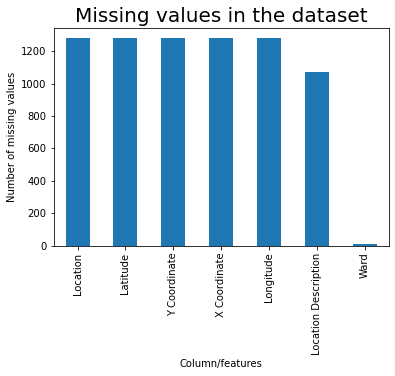

In [56]:
#Ploting the null data graph

import matplotlib.pyplot as plt         #Library to plot the graph

source = null_values.sort_values(ascending=False).iloc[:7]           #Arranging the null dateset in a order and taking the top 7 columns which as null columns
ax = source.plot(kind="bar")
ax.set_title("Missing values in the dataset", fontdict = {"fontsize":20})
ax.set_xlabel("Column/features")
ax.set_ylabel("Number of missing values")
plt.show()

In [57]:
data = data.dropna()      #Droping all the null data columns from the dataset
data.info()               

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196947 entries, 0 to 199082
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    196947 non-null  int64  
 1   Case Number           196947 non-null  object 
 2   Date                  196947 non-null  object 
 3   Month                 196947 non-null  object 
 4   Block                 196947 non-null  object 
 5   IUCR                  196947 non-null  object 
 6   Primary Type          196947 non-null  object 
 7   Description           196947 non-null  object 
 8   Location Description  196947 non-null  object 
 9   Arrest                196947 non-null  bool   
 10  Domestic              196947 non-null  bool   
 11  Beat                  196947 non-null  int64  
 12  District              196947 non-null  int64  
 13  Ward                  196947 non-null  float64
 14  Community Area        196947 non-null  int64  
 15  

In [58]:
#how much of the data has been retained after this removal
print(round(196947/199185 * 100),"Percentage of the data retained")      #values taken from the above information(data.info)

99 Percentage of the data retained


- Droping the rows will usually result in clean datasets and produce well-behaved
  but often, it removes a lot of information that reduce result accuracy
  since, 99% of the data is retained and since there is practically this is a
  best way to overcome by missing values

- otherwise i should fill(null columns): * for integers rows by taking mean or giving specific number and for strings row giving some string name for repective column etc,.

In [59]:
#verifying the dataset that contains null columns after drop down
data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Month                   0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

### Step 3: Perform exploratory analysis & visualization

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- **Make a note of interesting insights from the exploratory analysis**

In [60]:
# Continuous Variables
cont = data._get_numeric_data().columns
print("The continuous variables are: ",list(cont))

# Categorical Variables
print("The categorical variables are: ",list(set(data.columns) - set(cont)))

The continuous variables are:  ['ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']
The categorical variables are:  ['Month', 'Case Number', 'FBI Code', 'Primary Type', 'Location Description', 'Block', 'Description', 'IUCR', 'Date', 'Updated On', 'Location']


### Chicago Crime cases in 2020 and their total

In [61]:
criminal_case = data["Primary Type"].value_counts()         #This counts the unique values o primary type column in dataset
print(criminal_case)
print("***********************************************")
print("Total criminal cases in Chicago on 2020: ", criminal_case.sum())       #Suming all them

BATTERY                              39779
THEFT                                38443
CRIMINAL DAMAGE                      23693
ASSAULT                              17446
DECEPTIVE PRACTICE                   13621
OTHER OFFENSE                        11793
MOTOR VEHICLE THEFT                   9356
BURGLARY                              8353
WEAPONS VIOLATION                     7990
ROBBERY                               7546
NARCOTICS                             6938
CRIMINAL TRESPASS                     3993
OFFENSE INVOLVING CHILDREN            1748
PUBLIC PEACE VIOLATION                1232
CRIMINAL SEXUAL ASSAULT               1018
SEX OFFENSE                            871
HOMICIDE                               752
INTERFERENCE WITH PUBLIC OFFICER       630
ARSON                                  558
PROSTITUTION                           272
STALKING                               183
INTIMIDATION                           157
CONCEALED CARRY LICENSE VIOLATION      140
LIQUOR LAW 

In [62]:
'''
In this we take two columns primary type and ID, we calculate the total crime w.r.t IDs
and calucate the total values by IDs and arrange the result in increasing order
and taking top 5 coloumn to plot bar graph
'''
filter_data = data.groupby("Primary Type", as_index=False).agg({"ID":"count"})
filter_data = filter_data.sort_values(by=["ID"], ascending=False).iloc[:5]
filter_data = filter_data.sort_values(by="ID", ascending=True)

,Primary Type,ID
9,DECEPTIVE PRACTICE,13621
1,ASSAULT,17446
6,CRIMINAL DAMAGE,23693
31,THEFT,38443
2,BATTERY,39779


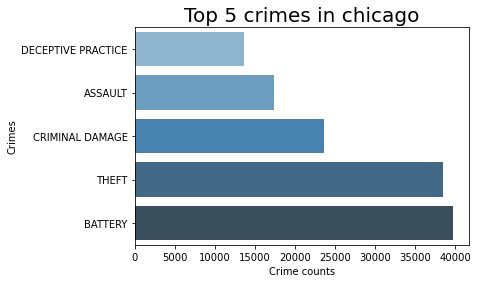

In [63]:
import seaborn as sns          #Library uses for graphs same as matplotlib with aot of features
sns.barplot(x="ID", y="Primary Type", data=filter_data, palette="Blues_d")    #Using aove cell declaration ploting bar graph
plt.xlabel("Crime counts")
plt.ylabel("Crimes")
plt.title("Top 5 crimes in chicago", fontdict = {"fontsize": 20})
filter_data

### Chicago city districts involved crimes

C:\Users\npram\anaconda3\envs\tenpy\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


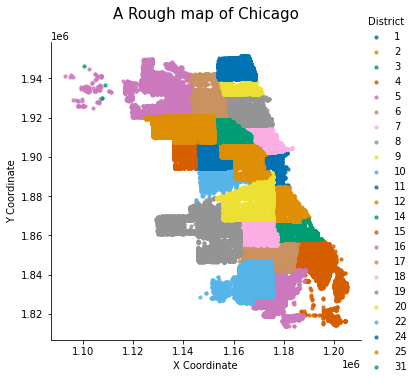

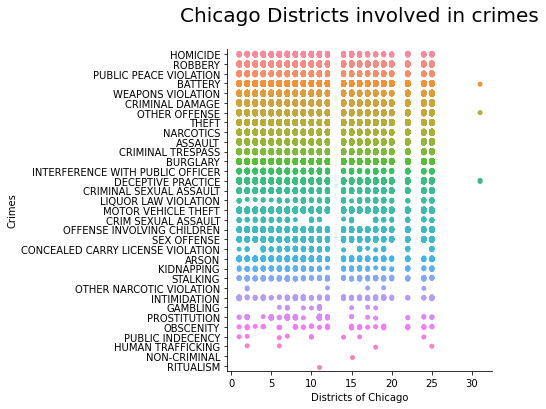

In [64]:
#ploting chicago map using Implot
#Ploting catplot / categorical data

sns.lmplot('X Coordinate',                 #Library used to plot 2D scatter plot 
           'Y Coordinate',
           data=data,                      #data import
           fit_reg=False,                  #Automatic adjust with size
           hue="District",                 #Column 
           palette='colorblind',
           height=5,                           
           scatter_kws={"marker": "+", 
                        "s": 10})
ax = plt.gca()
ax.set_title("A Rough map of Chicago\n", fontdict={'fontsize': 15})

g = sns.catplot(x="District", y="Primary Type", data=data)   #Two required column imported
g.fig.set_figwidth(10)                                       #Graph size
plt.xlabel("Districts of Chicago")
plt.ylabel("Crimes")
plt.title("Chicago Districts involved in crimes\n",fontdict = {"fontsize": 20})
plt.show()

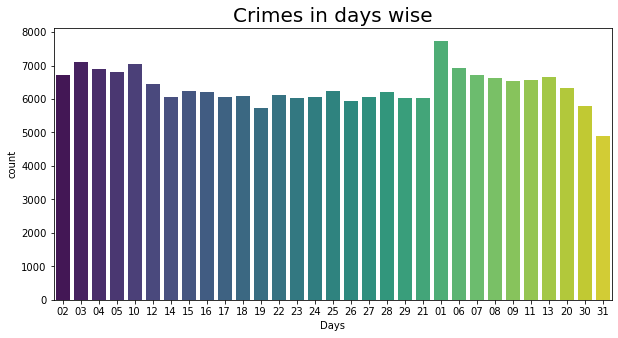

In [65]:
import datetime

#Extracting the day from the date["Date"] column
def Day(D):
    days_ex = datetime.datetime.strptime(D, "%m/%d/%Y %H:%M")   #datetime libraries to extarct time, date, month, year
    days = days_ex.strftime("%d")                               #Taking only days
    return days
data["Days"] = data["Date"].apply(Day)                     #creating the day column in dataframe and assigning the days extracted
fig, ax = plt.subplots(figsize=(10,5))                          #ploting the crime basis on days
sns.countplot(x="Days", data=data, palette="viridis")
plt.title("Crimes in days wise",fontdict = {"fontsize": 20})
plt.show()

### Crime gang activtaes in the regions of chicago city

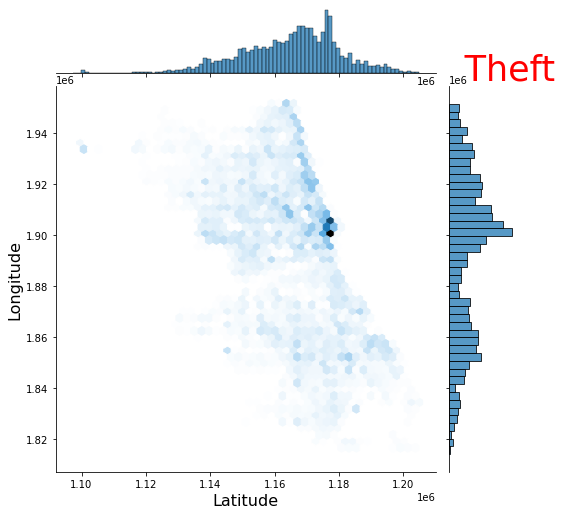

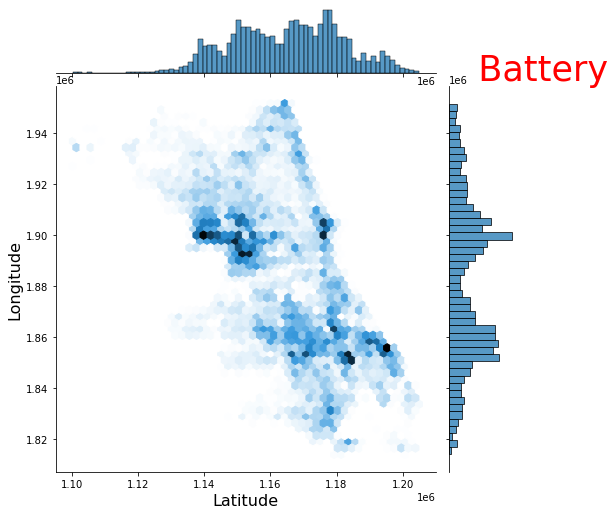

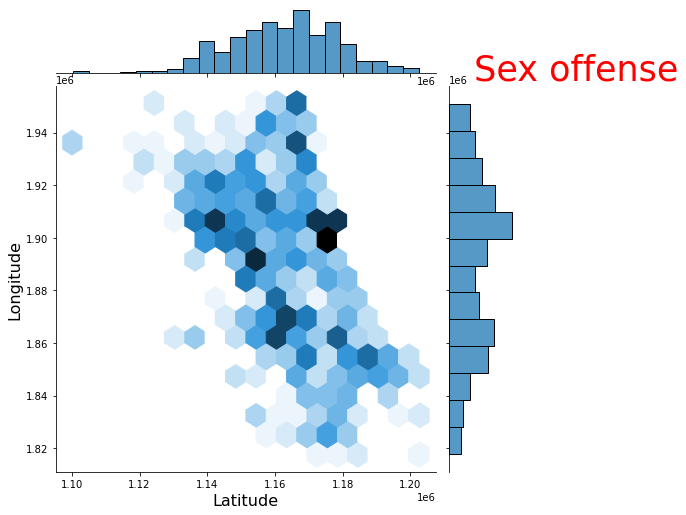

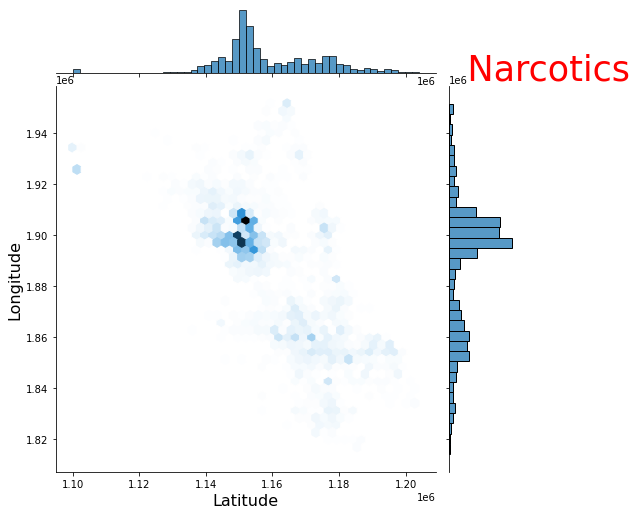

In [74]:
crime_loc = data[data["Primary Type"]=="THEFT"]
J = sns.jointplot(x=crime_loc["X Coordinate"].values, y=crime_loc["Y Coordinate"].values, height=7, kind="hex")
J.set_axis_labels("Latitude", "Longitude", fontsize=16)
plt.title("     Theft", fontsize=35, color="red")
plt.show()

crime_loc = data[data["Primary Type"]=="BATTERY"]
J = sns.jointplot(x=crime_loc["X Coordinate"].values, y=crime_loc["Y Coordinate"].values, height=7, kind="hex")
J.set_axis_labels("Latitude", "Longitude", fontsize=16)
plt.title("           Battery", fontsize=35, color="red")
plt.show()

crime_loc = data[data["Primary Type"]=="SEX OFFENSE"]
J = sns.jointplot(x=crime_loc["X Coordinate"].values, y=crime_loc["Y Coordinate"].values, height=7, kind="hex")
J.set_axis_labels("Latitude", "Longitude", fontsize=16)
plt.title("                 Sex offense", fontsize=35, color="red")
plt.show()

crime_loc = data[data["Primary Type"]=="NARCOTICS"]
J = sns.jointplot(x=crime_loc["X Coordinate"].values, y=crime_loc["Y Coordinate"].values, height=7, kind="hex")
J.set_axis_labels("Latitude", "Longitude", fontsize=16)
plt.title("            Narcotics", fontsize=35, color="red")
plt.show()

### Step 4: Ask & answer questions about the data

- Ask at least 4 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or/and by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does

### Ploting Pie graph of top 10 crimes

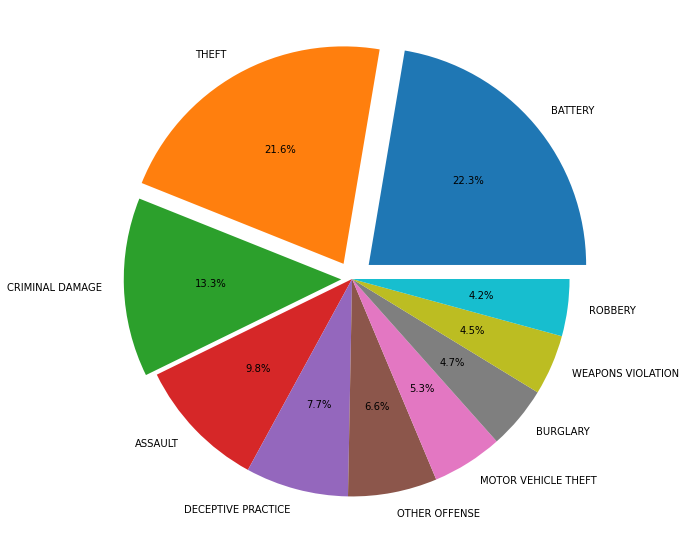

In [67]:
#Taking Top 10 crime cases and ploting pie chart

explode = (0.1,0.08,0.05,0,0,0,0,0,0,0)
crime_plot = data["Primary Type"].value_counts().iloc[:10]            #Sorting the column in increasing order then taking top 10
ax= crime_plot.plot.pie(autopct="%.1f%%", figsize=[10,10], explode = explode)   #Ploting pie graph in percentage
ax.set_ylabel(" ")
plt.show()

### Arrest rate of criminals in chicago this year 

In [68]:
L = data["Arrest"].value_counts()          #Count the unique values of specific column
Not_Arrested = L[0]                        #Total Not_Arrested value assign
Arrested = L[1]                            #Total Arrested value assign
print("Percentage of arrested rate of criminals: ",round(Arrested/(Arrested+Not_Arrested)*100), "%")      #calculating the arrested rate
print("Percentage of criminals escaped/not arrested: ",round(Not_Arrested/(Arrested+Not_Arrested)*100), "%") #calculating non-arrested rate

arrest = pd.DataFrame({"Status" : ["Not Arrested", "Arrested"], "Value":list(L)})   
arrest            #Printing Number of Arrested and not arrested value

Percentage of arrested rate of criminals:  16 %
Percentage of criminals escaped/not arrested:  84 %


,Status,Value
0,Not Arrested,165326
1,Arrested,31621


### Number of people arrested and non-arrested by the chicago police on month wise and crime wise

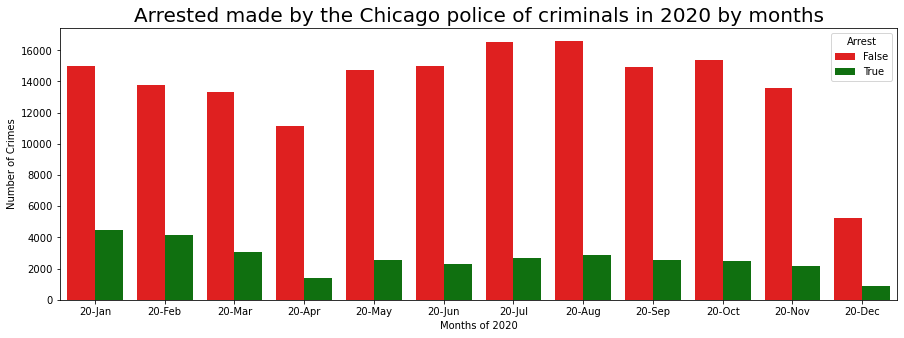

In [69]:
#Plotimg the count plot graph

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="Month",
                   hue="Arrest",       #parameter that take columns name for color encoding here! Arrest weather True or false
                   data=data[["Month","Arrest"]],      #Two column from the dataset month and arrest
                   palette=["Red", "Green"])           #color representation
ax.set_title("Arrested made by the Chicago police of criminals in 2020 by months",fontdict = {"fontsize": 20})
ax.set(xlabel="Months of 2020", ylabel="Number of Crimes")
plt.show()

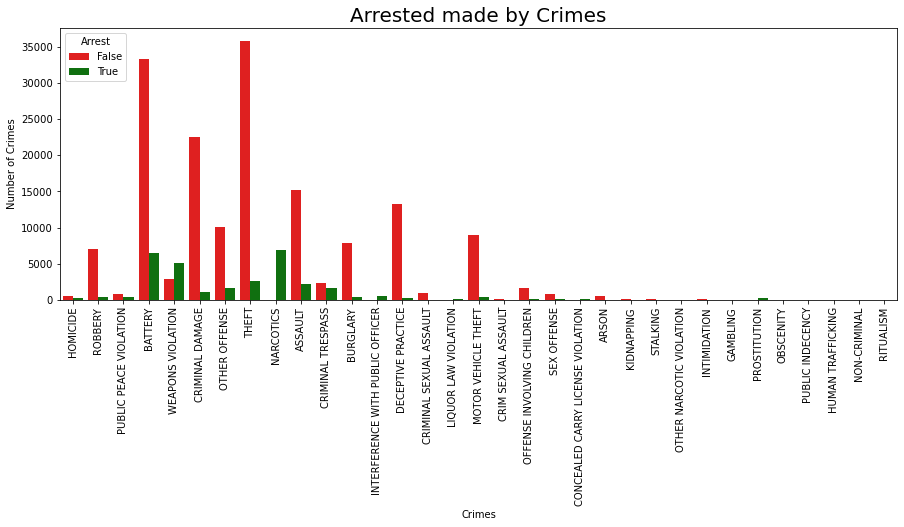

In [70]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="Primary Type",                       #taking crime columns
                   hue="Arrest",       #parameter that take columns name for color encoding here! Arrest weather True or false
                   data=data[["Primary Type","Arrest"]],      #Two column from the dataset month and arrest
                   palette=["Red", "Green"])           #color representation
ax.set_title("Arrested made by Crimes",fontdict = {"fontsize": 20})
ax.set(xlabel="Crimes", ylabel="Number of Crimes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Low crime rates hours in a day

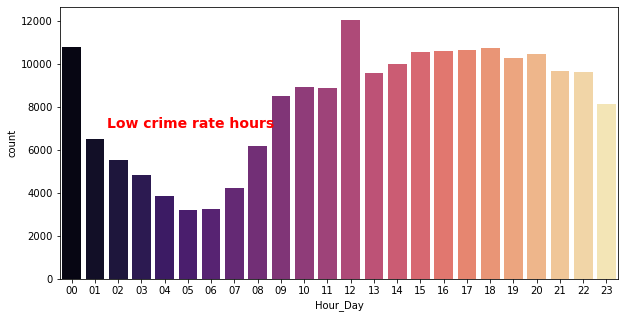

In [71]:
#Extracting the hours from the date["Date"] column
def hour(x):
    hours_ex = datetime.datetime.strptime(x, "%m/%d/%Y %H:%M")      #same libraries used as above mentioned
    hours = hours_ex.strftime("%H")                                 #extracting the hours 
    return hours 
data['Hour_Day'] = data['Date'].apply(hour)                         #creating hour_day column and putting the values extracted

time = data["Hour_Day"].sort_values()
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=time, data=data, palette="magma")             #ploting days hours crime per day
plt.text(1.5, 7000, "Low crime rate hours", fontdict={'fontsize': 14, 'color':"red" }, weight='bold')
plt.show()

### Location involved in crime

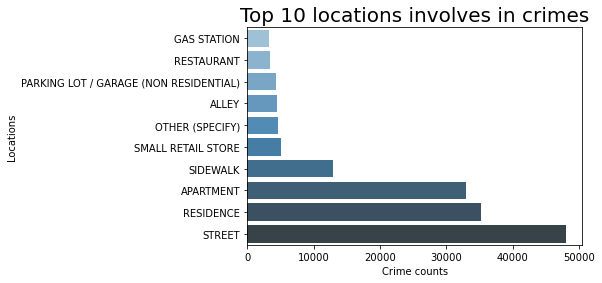

In [72]:
#Top 5 crime cases
import seaborn as sns
filter_data = data.groupby("Location Description", as_index=False).agg({"ID":"count"})
filter_data = filter_data.sort_values(by=["ID"], ascending=False).iloc[:10]
filter_data = filter_data.sort_values(by="ID", ascending=True)

sns.barplot(x="ID", y="Location Description", data=filter_data, palette="Blues_d")
plt.xlabel("Crime counts")
plt.ylabel("Locations")
plt.title("Top 10 locations involves in crimes", fontdict = {"fontsize": 20})
plt.show()

### Example:

https://www.kaggle.com/kumarajarshi/life-expectancy-who:

WHO created a dataset of the health status of all countries over time and includes statistics on life expectancy, adult mortality, and more. Using this dataset, what is the relationships between various variables ? What has the biggest impact on life expectancy?

This dataset was created to answer the following questions:

1.    Do various predicting factors that has been chosen initially really affect Life expectancy? What are the predicting variables actually affecting the life expectancy?
2.    Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3.    How do Infant and Adult mortality rates affect life expectancy?
4.    Does Life Expectancy have a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol, etc.
5.    What is the impact of schooling on the lifespan of humans?
6.    Does Life Expectancy have a positive or negative relationship with drinking alcohol?
7.    Do densely populated countries tend to have a lower life expectancy?
8.    What is the impact of Immunization coverage on life Expectancy?



### Step 5: Summarize your inferences & write a conclusion

- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections

# CONCLUSION

### Step 6: Submit your work 
- use the attachment feature of teams



Python file:   EDA
PDF: documentation of my work
CSV: Dataset